In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import datetime
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\justi\Downloads\Python Data Analysis Datasets\Priceline Flight Data\flight.csv", low_memory=False)
df.head()

,Airline name,Travel Time,Unnamed: 2,Number of Stoppage,Ticket prize(Doller),Depreture Airport,Depreture Time,1st Stoppage Waiting Hour,1st Stoppage,2nd StoppageWaiting Time,...,Unnamed: 485,Unnamed: 486,Unnamed: 487,Unnamed: 488,Unnamed: 489,Unnamed: 490,Unnamed: 491,Unnamed: 492,Unnamed: 493,Unnamed: 494
0,Emirates,51h 15m,NaN,2 Stops,1156,DAC,01:40a,11h 15m,DXB,19h 40m,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Emirates,57h 25m,NaN,2 Stops,1156,DAC,07:30p,17h 15m,DXB,19h 40m,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Turkish,26h 5m,NaN,1 Stop,1175,DAC,06:35a,6h 20m,IST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kuwait,21h 15m,NaN,1 Stop,1264,DAC,03:10a,2h 10m,KWI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Etihad,22h 35m,NaN,1 Stop,1283,DAC,08:55p,3h 0m,AUH,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print(('{}-{}%').format(col,round(pct_missing*100)))

Airline name -0%
Travel  Time-0%
Unnamed: 2-100%
Number of  Stoppage -0%
Ticket prize(Doller)-0%
Depreture  Airport-12%
Depreture Time-0%
1st Stoppage Waiting Hour-2%
1st Stoppage-2%
2nd StoppageWaiting Time-73%
2nd Stoppage-73%
3rd Stoppage Waiting time-99%
3rd Stoppage-99%
Destination Airport-12%
Arrival Time-0%
Arrival Date-6%
Unnamed: 16-99%
Unnamed: 17-99%
Unnamed: 18-98%
Unnamed: 19-98%
Unnamed: 20-98%
Unnamed: 21-98%
Unnamed: 22-98%
Unnamed: 23-98%
Unnamed: 24-98%
Unnamed: 25-99%
Unnamed: 26-98%
Unnamed: 27-99%
Unnamed: 28-99%
Unnamed: 29-99%
Unnamed: 30-99%
Unnamed: 31-99%
Unnamed: 32-99%
Unnamed: 33-99%
Unnamed: 34-99%
Unnamed: 35-100%
Unnamed: 36-100%
Unnamed: 37-100%
Unnamed: 38-100%
Unnamed: 39-100%
Unnamed: 40-100%
Unnamed: 41-100%
Unnamed: 42-100%
Unnamed: 43-100%
Unnamed: 44-100%
Unnamed: 45-100%
Unnamed: 46-100%
Unnamed: 47-100%
Unnamed: 48-100%
Unnamed: 49-100%
Unnamed: 50-100%
Unnamed: 51-100%
Unnamed: 52-100%
Unnamed: 53-100%
Unnamed: 54-100%
Unnamed: 55-100%
Unnamed

In [4]:
#Get rid of all those unnamed columns
df.drop(df.columns[df.columns.str.contains('unnamed',case=False)],axis=1,inplace=True)
#Renaming the columns
df.rename(columns={"Airline name":"Airline",
                   "Depreture Airport":"Departure airport",
                   "Depreture Time":"Departure Time",
                   "Ticket prize(Doller)":"Price",
                   "Number of Stoppage":"Stops",
                  "1st Stoppage Waiting Hour":"1st stop wtime",
                  "2nd StoppageWaiting Time":"2nd stop wtime",
                  "3rd Stoppage Waiting time":"3rd stop wtime"},inplace=True)
#for some reason, a couple of columns won't rename using this method. Rename using column index
df.rename(columns={df.columns[0]:"Airline",df.columns[1]:"Travel time in hours",df.columns[4]:"Departure Airport",df.columns[2]:"Stops"},inplace=True)

In [10]:
#Now, I convert columns into data types I can work with, and also clean non-numeric data
temp=['Travel time in hours','1st stop wtime','2nd stop wtime','3rd stop wtime']

for x in temp:
    df[x] = df[x].fillna(0)
    df[x] = df[x].astype(str)

#Cleaning non-numeric rows from the Price column
df['Price']=df['Price'].astype(str)
df['Price']=df['Price'].str.replace('$','x',regex=False)
i = df.index[df['Price'].str.isalpha()]
df.drop(i,inplace=True)

#Now I can convert the Price column to int
df.Price=df.Price.astype(int)

#converting duration columns into int (minutes)
df['Travel time in hours']=df['Travel time in hours'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df['1st stop wtime']=df['1st stop wtime'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df['2nd stop wtime']=df['2nd stop wtime'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').str.replace('sc','+0').str.replace('jRQBWg','+0').apply(eval)
df['3rd stop wtime']=df['3rd stop wtime'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df.head(1)

for x in temp:
    df[x]=(df[x]/60).round(2)
df.head(1)

#clean columns
df.columns=[col.strip() for col in list(df.columns)]

In [11]:
#pivoting out airline stoppages, we learn that British Airways is the only airline to have flights that feature a 3rd stoppage. 
df.pivot_table(index='Airline',values=['1st Stoppage','2nd Stoppage','3rd Stoppage'],aggfunc='count')

,1st Stoppage,2nd Stoppage,3rd Stoppage
Airline,,,
ANA All Nippon,4,0,0
APG Airilines,1,0,0
Aer Lingus,4,0,0
Air Canada,50,1,0
Air China,1,0,0
Air France,31,16,0
Air India,47,11,0
American,120,32,0
Asiana,2,0,0


In [12]:
#drop what looks to be a data entry error or something, either way it's not a real airline name
i = df.index[df.Airline == 'That\'s 6% off the retail price']
df.drop(i,inplace=True)
df.head(1)

,Airline,Travel time in hours,Stops,Price,Departure Airport,Departure Time,1st stop wtime,1st Stoppage,2nd stop wtime,2nd Stoppage,3rd stop wtime,3rd Stoppage,Destination Airport,Arrival Time,Arrival Date
0,Emirates,51.25,2 Stops,1156,DAC,01:40a,11.25,DXB,19.67,MXP,0.0,NaN,JFK,06:55p,Apr 8


In [13]:
#Most people dislike the act of traveling and would like to minimize travel time. 
#Let's determine some common routes and find out which airlines minimize travel time and provide good value for it too. 

In [14]:
#lets start with London and NYC
airports=['LHR','LCY','LGW','LTN','STN','SEN','JFK','EWR','LGA']
london_nyc=df[df['Departure Airport'].isin(airports) & df['Destination Airport'].isin(airports)].reset_index(drop=True)
london_nyc_sorted=london_nyc.pivot_table(index=['Airline','Stops'],values=['Price','Travel time in hours'],aggfunc=['mean','count']).round(2)
london_nyc_sorted = london_nyc_sorted.reset_index().sort_values(by=[('mean','Price'),('mean','Travel time in hours')],ascending=False).set_index(['Airline','Stops'])
london_nyc_sorted

mean                      count  \
                            Price Travel time in hours Price   
Airline          Stops                                         
Air China        1 Stop   1388.00                22.42     1   
SWISS            2 Stops  1316.80                38.14     5   
Austrian         1 Stop   1281.00                20.25     4   
Lufthansa        1 Stop   1253.00                23.57     6   
Asiana           1 Stop   1218.00                20.50     1   
Singapore        1 Stop   1217.59                24.61    17   
SWISS            1 Stop   1188.91                22.20    11   
Kuwait           1 Stop   1111.67                25.75     3   
Multiple         1 Stop   1109.79                22.76    14   
KLM-Royal Dutch  1 Stop   1108.67                22.38    12   
Saudia           1 Stop   1102.00                21.08     2   
Srilankan        1 Stop   1098.00                26.75     1   
British          1 Stop   1093.03                23.51    29   
Qatar            1 Stop   1090.03                23.76    30   
Oman             1 Stop   1085.00                21.34     2   
Turkish          1 Stop   1076.87                24.97    15   
Ethiopian        1 Stop    993.00                34.25     1   
Lufthansa        2 Stops   989.00                37.33     3   
Multiple         2 Stops   930.00                25.15     7   
Qantas           1 Stop    894.00                23.79     2   
KLM-Royal Dutch  2 Stops   872.00                29.83     1   
Air India        1 Stop    868.00                29.42     4   
Air France       1 Stop    850.00                33.14     3   
Royal Jordanian  1 Stop    845.00                16.17     1   
Emirates         1 Stop    829.06                23.69    36   
China Southern   1 Stop    817.00                34.33     1   
Finnair          1 Stop    796.00                25.47     3   
EVA              Nonstop   756.00                11.50     1   
Vistara          1 Stop    753.00                33.92     1   
Gulf Air Company 1 Stop    613.50                26.46     2   
Etihad           1 Stop    588.00                25.38    11   

                                               
                         Travel time in hours  
Airline          Stops                         
Air China        1 Stop                     1  
SWISS            2 Stops                    5  
Austrian         1 Stop                     4  
Lufthansa        1 Stop                     6  
Asiana           1 Stop                     1  
Singapore        1 Stop                    17  
SWISS            1 Stop                    11  
Kuwait           1 Stop                     3  
Multiple         1 Stop                    14  
KLM-Royal Dutch  1 Stop                    12  
Saudia           1 Stop                     2  
Srilankan        1 Stop                     1  
British          1 Stop                    29  
Qatar            1 Stop                    30  
Oman             1 Stop                     2  
Turkish          1 Stop                    15  
Ethiopian        1 Stop                     1  
Lufthansa        2 Stops                    3  
Multiple         2 Stops                    7  
Qantas           1 Stop                     2  
KLM-Royal Dutch  2 Stops                    1  
Air India        1 Stop                     4  
Air France       1 Stop                     3  
Royal Jordanian  1 Stop                     1  
Emirates         1 Stop                    36  
China Southern   1 Stop                     1  
Finnair          1 Stop                     3  
EVA              Nonstop                    1  
Vistara          1 Stop                     1  
Gulf Air Company 1 Stop                     2  
Etihad           1 Stop                    11

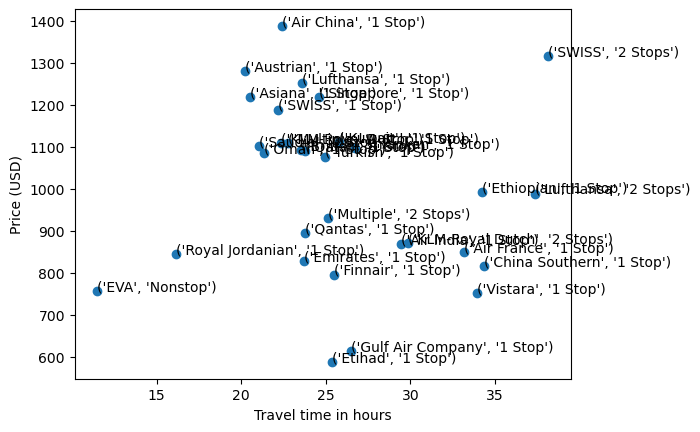

In [15]:
x=london_nyc_sorted[('mean','Travel time in hours')]
y=london_nyc_sorted[('mean','Price')]
a=london_nyc_sorted.index

fig,ax=plt.subplots()
ax.scatter(x,y)
ax.set_xlabel ('Travel time in hours')
ax.set_ylabel ('Price (USD)')

for i,txt in enumerate(a):
    ax.annotate(txt, (x[i],y[i]))

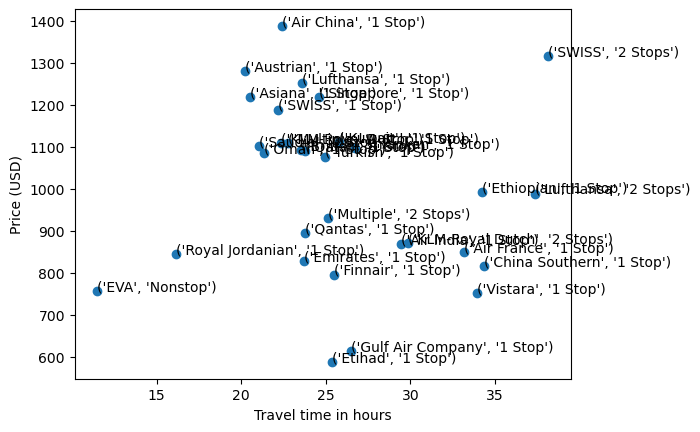

In [16]:
x=london_nyc_sorted[('mean','Travel time in hours')]
y=london_nyc_sorted[('mean','Price')]
a=london_nyc_sorted.index

plt.scatter(x,y)
plt.xlabel ('Travel time in hours')
plt.ylabel ('Price (USD)')

for i in range(london_nyc_sorted.shape[0]):
    plt.text(x=x[i],y=y[i],s=a[i])
    
plt.show()

In [17]:
#there's too much going on, we should limit to airlines that fly this route prominently
london_nyc_sorted=london_nyc_sorted.loc[london_nyc_sorted[('count','Price')]>=10].sort_values(by=[('mean','Price'),('mean','Travel time in hours')],ascending=False)
london_nyc_sorted

mean                      count  \
                          Price Travel time in hours Price   
Airline         Stops                                        
Singapore       1 Stop  1217.59                24.61    17   
SWISS           1 Stop  1188.91                22.20    11   
Multiple        1 Stop  1109.79                22.76    14   
KLM-Royal Dutch 1 Stop  1108.67                22.38    12   
British         1 Stop  1093.03                23.51    29   
Qatar           1 Stop  1090.03                23.76    30   
Turkish         1 Stop  1076.87                24.97    15   
Emirates        1 Stop   829.06                23.69    36   
Etihad          1 Stop   588.00                25.38    11   

                                             
                       Travel time in hours  
Airline         Stops                        
Singapore       1 Stop                   17  
SWISS           1 Stop                   11  
Multiple        1 Stop                   14  
KLM-Royal Dutch 1 Stop                   12  
British         1 Stop                   29  
Qatar           1 Stop                   30  
Turkish         1 Stop                   15  
Emirates        1 Stop                   36  
Etihad          1 Stop                   11

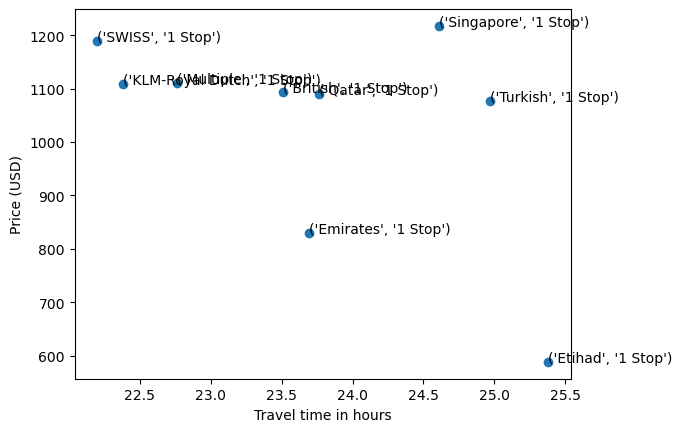

In [18]:
#lets's run the scatterplot again, now only with airlines with more than 10 flights of this route recorded
x=london_nyc_sorted[('mean','Travel time in hours')]
y=london_nyc_sorted[('mean','Price')]
a=london_nyc_sorted.index

fig,ax=plt.subplots()
ax.scatter(x,y)
ax.set_xlabel ('Travel time in hours')
ax.set_ylabel ('Price (USD)')

for i,txt in enumerate(a):
    ax.annotate(txt, (x[i],y[i]))

In [19]:
#Another route: NYC and Paris
airports = ['JFK','EWR','LGA','CDG','LBG','ORY','BVA']
paris_nyc = df[df['Departure Airport'].isin(airports) & df['Destination Airport'].isin(airports)].reset_index(drop=True)
paris_nyc_sorted = paris_nyc.pivot_table(index = ['Airline','Stops'],values=['Price','Travel time in hours'],aggfunc=['mean','count']).round(2)
paris_nyc_sorted = paris_nyc_sorted.loc[paris_nyc_sorted[('count','Price')]>=10].sort_values(by=[('mean','Price')],ascending=False)
paris_nyc_sorted

mean                      count                     
                     Price Travel time in hours Price Travel time in hours
Airline    Stops                                                          
Multiple   1 Stop  1630.65                14.26    40                   40
Air Canada 1 Stop  1612.50                14.28    14                   14
United     1 Stop  1610.39                14.49    57                   57
American   1 Stop  1022.50                14.97    10                   10

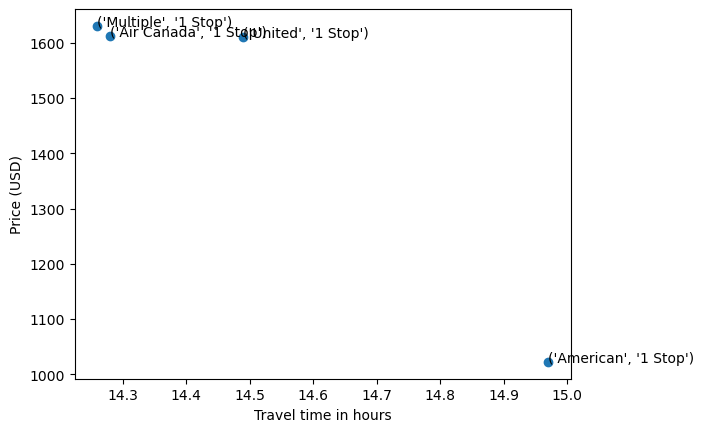

In [20]:
x=paris_nyc_sorted[('mean','Travel time in hours')]
y=paris_nyc_sorted[('mean','Price')]
a=paris_nyc_sorted.index

fig,ax = plt.subplots()
ax.scatter(x,y)
ax.set_xlabel ('Travel time in hours')
ax.set_ylabel('Price (USD)')

for i,txt in enumerate(a):
    ax.annotate(txt,(x[i],y[i]))

In [23]:
#Another one LA to London
airports=['CDG','LBG','ORY','BVA','JFK']
la_london=df[df['Departure Airport'].isin(airports) & df['Destination Airport'].isin(airports)].reset_index(drop=True).pivot_table(index=['Airline','Stops'],values=['Price','Travel time in hours'],aggfunc=['mean','count'])
la_london_sorted=la_london.loc[la_london[('count','Travel time in hours')]>=3].sort_values(by=[('mean','Price')],ascending=False)
la_london_sorted

mean                      count                     
                        Price Travel time in hours Price Travel time in hours
Airline   Stops                                                              
Lufthansa 1 Stop  1646.000000            11.693333     3                    3
Multiple  1 Stop  1636.071429            12.975714    14                   14
SWISS     1 Stop  1633.333333            13.136667     3                    3
United    1 Stop  1576.777778            13.498889     9                    9
American  1 Stop  1340.333333            16.866667     3                    3

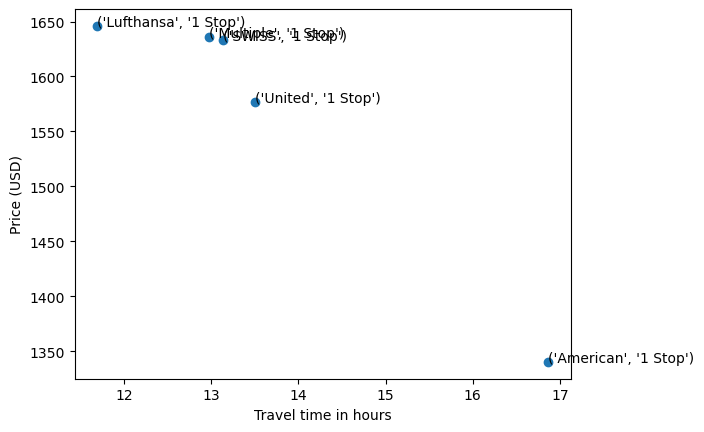

In [25]:
x=la_london_sorted[('mean','Travel time in hours')]
y=la_london_sorted[('mean','Price')]
a=la_london_sorted.index

fig,ax=plt.subplots()
ax.scatter(x,y)
ax.set_xlabel ('Travel time in hours')
ax.set_ylabel ('Price (USD)')

for i,txt in enumerate(a):
    ax.annotate(txt, (x[i],y[i]))